In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score


In [3]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Prepare the training data
X_train = train_df[features]
y_train = train_df[target]

# Prepare the test data
X_test = test_df[features]

In [4]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

In [5]:
# Create a DataFrame for the output
output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})

# Save the predictions to a CSV file
output.to_csv('submission.csv', index=False)

# Print model performance on the training data
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print(f'Mean Squared Error on Training Data: {mse}')
print(f'R² Score on Training Data: {r2}')

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated Mean Squared Error: {-cv_scores.mean()}')

Mean Squared Error on Training Data: 2625932483.691595
R² Score on Training Data: 0.5836339766023473
Cross-Validated Mean Squared Error: 2676474166.198029


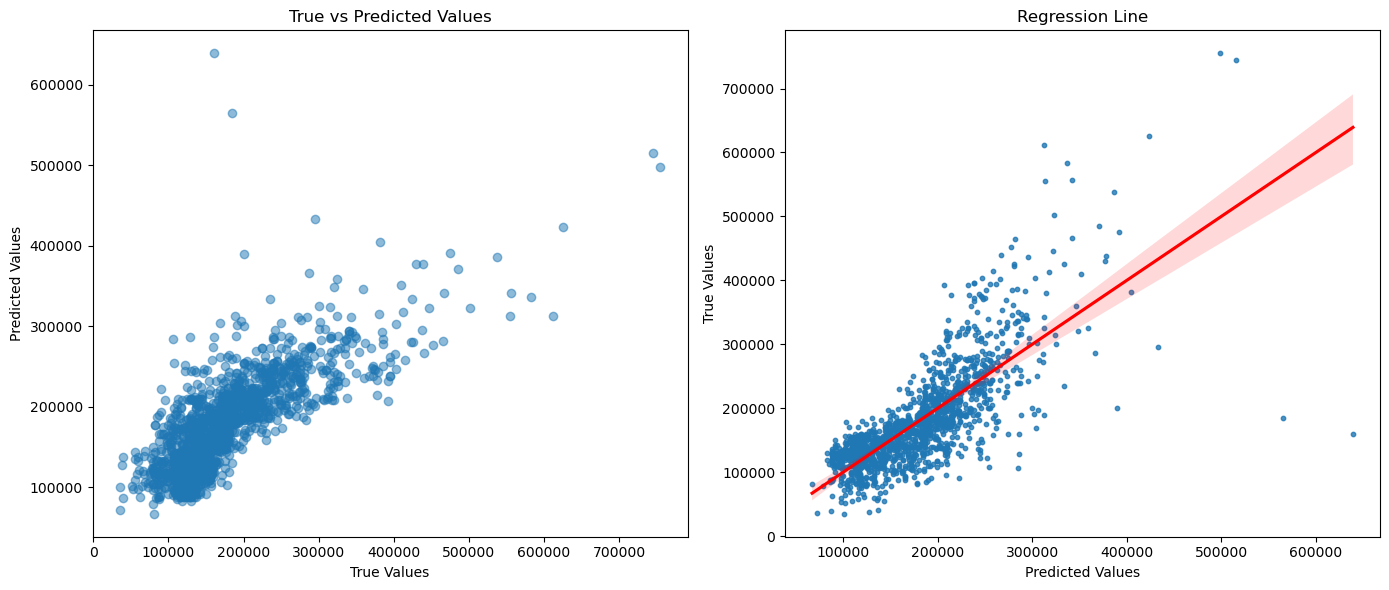

In [6]:
# Visualization
plt.figure(figsize=(14, 6))

# Scatter plot of true vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Regression line plot
plt.subplot(1, 2, 2)
sns.regplot(x=train_predictions, y=y_train, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Regression Line')

plt.tight_layout()
plt.show()